# Bike Share Data Exploration

## Preliminary Wrangling

This document explores a dataset containing bike share trips and customer types for approximately 5,713,414 trips that were made between June 2017 - February 2020 in San Francisco. 

[Source of Data](https://www.lyft.com/bikes/bay-wheels/system-data)

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime
import calendar

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe, print statistics
df_2017 = pd.read_csv('2017-fordgobike-tripdata.csv')
df_2018_01 = pd.read_csv('201801-fordgobike-tripdata.csv')
df_2018_02 = pd.read_csv('201802-fordgobike-tripdata.csv')
df_2018_03 = pd.read_csv('201803-fordgobike-tripdata.csv')
df_2018_04 = pd.read_csv('201804-fordgobike-tripdata.csv')
df_2018_05 = pd.read_csv('201805-fordgobike-tripdata.csv')
df_2018_06 = pd.read_csv('201806-fordgobike-tripdata.csv')
df_2018_07 = pd.read_csv('201807-fordgobike-tripdata.csv')
df_2018_08 = pd.read_csv('201808-fordgobike-tripdata.csv')
df_2018_09 = pd.read_csv('201809-fordgobike-tripdata.csv')
df_2018_10 = pd.read_csv('201810-fordgobike-tripdata.csv')
df_2018_11 = pd.read_csv('201811-fordgobike-tripdata.csv')
df_2018_12 = pd.read_csv('201812-fordgobike-tripdata.csv')
df_2019_01 = pd.read_csv('201901-fordgobike-tripdata.csv')
df_2019_02 = pd.read_csv('201902-fordgobike-tripdata.csv')
df_2019_03 = pd.read_csv('201903-fordgobike-tripdata.csv')
df_2019_04 = pd.read_csv('201904-fordgobike-tripdata.csv')
df_2019_05 = pd.read_csv('201905-baywheels-tripdata.csv')
df_2019_06 = pd.read_csv('201906-baywheels-tripdata.csv')
df_2019_07 = pd.read_csv('201907-baywheels-tripdata.csv')
df_2019_08 = pd.read_csv('201908-baywheels-tripdata.csv')
df_2019_09 = pd.read_csv('201909-baywheels-tripdata.csv')
df_2019_10 = pd.read_csv('201910-baywheels-tripdata.csv')
df_2019_11 = pd.read_csv('201911-baywheels-tripdata.csv')
df_2019_12 = pd.read_csv('201912-baywheels-tripdata.csv')
df_2020_01 = pd.read_csv('202001-baywheels-tripdata.csv')
df_2020_02 = pd.read_csv('202002-baywheels-tripdata.csv')

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
# Combine monthly data into a master dataframe
df_list = [df_2017, df_2018_01, df_2018_01, df_2018_02, df_2018_03, df_2018_04, df_2018_05,df_2018_06, df_2018_07,
           df_2018_08,df_2018_09,df_2018_10,df_2018_11,df_2018_12,df_2019_01,df_2019_02,df_2019_03,
           df_2019_04,df_2019_05,df_2019_06,df_2019_07,df_2019_08,df_2019_09,df_2019_10,df_2019_11,
           df_2019_12,df_2020_01, df_2020_02]

bike_df = pd.DataFrame()
for df in df_list:
    bike_df = bike_df.append(df, sort=False)

print(bike_df.shape[0])

5713414


In [6]:
# high-level overview of data shape and composition
print(bike_df.shape)
print(bike_df.dtypes)
print(bike_df.head())

(5713414, 15)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
bike_share_for_all_trip     object
rental_access_method        object
dtype: object
   duration_sec                start_time                  end_time  \
0         80110  2017-12-31 16:57:39.6540  2018-01-01 15:12:50.2450   
1         78800  2017-12-31 15:56:34.8420  2018-01-01 13:49:55.6170   
2         45768  2017-12-31 22:45:48.4110  2018-01-01 11:28:36.8830   
3         62172  2017-12-31 17:31:10.6360  2018-01-01 10:47:23.5310   
4         43603  2017-12-31 14:23:14.0010  2018-01-01 02:29:57.5710   

   start_station_id 

In [7]:
# Review datatype of each columns
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5713414 entries, 0 to 432353
Data columns (total 15 columns):
duration_sec               int64
start_time                 object
end_time                   object
start_station_id           float64
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
bike_share_for_all_trip    object
rental_access_method       object
dtypes: float64(6), int64(2), object(7)
memory usage: 697.4+ MB


In [8]:
bike_df.start_time.min(), bike_df.start_time.max()

('2017-06-28 09:47:36.3470', '2020-03-01 23:56:31')

In [9]:
# convert start time, end time to datetime data type
bike_df.start_time = pd.to_datetime(bike_df.start_time)
bike_df.end_time = pd.to_datetime(bike_df.end_time)

In [10]:
# Create new columns of 'day_of_week' and 'hour_of_day' for later analysis
bike_df['day_of_week'] = bike_df['start_time'].dt.day_name()
bike_df['hour_of_day'] = bike_df['start_time'].dt.hour

### Structure of the dataset

There are 5,713,414 San Francisco bike share trips between 2017 July - 2020 Febuary in this dataset. There are 15 columns which include durations, start time, end time, start station id, start station name, start station latitude, start station longtitude, end station id, end station name, end station latitude, end station longitude, bike id, user type, bike share for all trip and retnal access method. 

There are some missing values in the start station,_id, start_station_name, end_station_id, end_station_name, bike_share_for_all_trip and rental_access_method. 

- User Types consist of Subscriber and Customer.
- Rental Access Methods consist of App and Clipper.
- bike_share_for_all_trip consist of Yes and No responses. 

### Main features of interest in this dataset

I'm most interested in finding out the differences in User Types and Rental Access Methods and the bike usages during weekdays vs weekend. 

- When do trips happen most frequently? Which day? Weekdays or Weekend?
- What is the average trip durations? 
- Do Subscriber tend to have longer or shorter trips than Customer? Any difference for when they use the bikes? 
- Do App users have have longer or shorter trips than Clipper users? Any difference for when they use the bikes?
- What are the most popular stations that bike share users start their trips? 
- The most common stations for users to end their trips?


### Features in the dataset that I think will help support the investigation into your features of interest

I expect the bike share service are used more often on Weekday than on Weekend. The peak hour during the day should be the rush hours (i.e. 7-9am & 4-6pm). The subscribers should have longer trip duration on average compared with the regular customers. 

## Univariate Exploration

In [11]:
bike_df.duration_sec.describe()

count    5.713414e+06
mean     8.495921e+02
std      2.257762e+03
min      6.000000e+01
25%      3.590000e+02
50%      5.700000e+02
75%      8.910000e+02
max      9.121100e+05
Name: duration_sec, dtype: float64

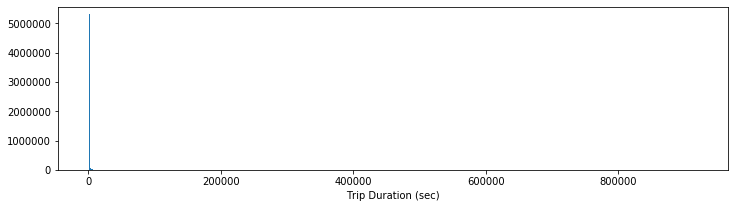

In [12]:
# Distribution of the trip duration in second
# Start with a standard scaled plot. The data has a wide range and can't read the distribution well. 
bins = np.arange(60, 920000, 1500)
plt.figure(figsize = [12,3])
plt.hist(data = bike_df, x= 'duration_sec', bins=bins)
plt.xlabel('Trip Duration (sec)');

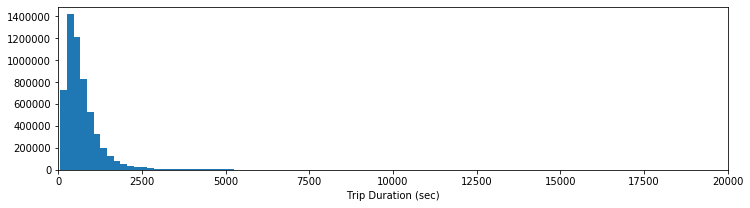

In [13]:
# Distribution of the trip duration in second
# Set the limit on x-axis to view the distirubtion more clear. 
bins = np.arange(60, 20000, 200)
plt.figure(figsize = [12,3])
plt.hist(data = bike_df, x= 'duration_sec', bins=bins)
plt.xlim(0,20000)
plt.xlabel('Trip Duration (sec)');

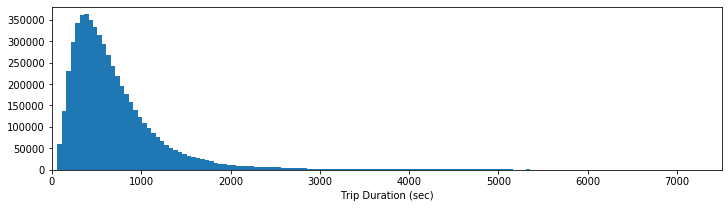

In [14]:
# Distribution of the trip duration in second
# Set even smaller limit on x-axis to view the distirubtion more clear. It has a long tail distribution. 
bins = np.arange(60, 7500, 50)
plt.figure(figsize = [12,3])
plt.hist(data = bike_df, x= 'duration_sec', bins=bins)
plt.xlim(0,7500)
plt.xlabel('Trip Duration (sec)');

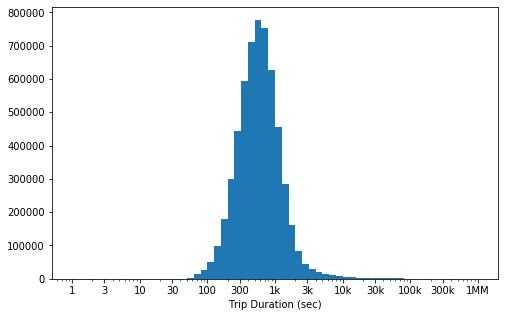

In [15]:
# Since the distribution has a long tail. Let's put it on a log scale and review the distribution again
log_binsize = 0.1
bins = 10 ** np.arange(0, np.log10(bike_df.duration_sec).max()+log_binsize, log_binsize)
ticks = [1,3,10,30,100,300,1000,3000,10000,30000,100000,300000,1000000]
ticks_label = [1,3,10,30,100,300,'1k','3k','10k','30k','100k','300k','1MM']
plt.figure(figsize=[8,5])
plt.hist(data = bike_df, x= 'duration_sec', bins= bins)
plt.xscale('log')
plt.xticks(ticks, ticks_label)
plt.xlabel('Trip Duration (sec)');

Duration time has a normal distribution with most trips are under 1,000 seconds (~16 minutes) with an average duration of 850 seconds. It will be interesting to see if the average trip durations are different among user types. 

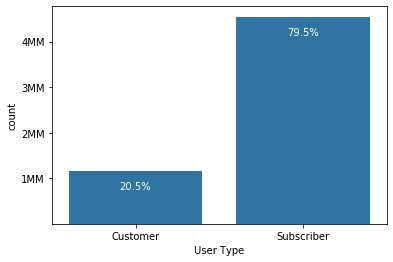

In [16]:
# Proportion of 2 User Types
base_color = sb.color_palette()[0]
sb.countplot(data=bike_df, x='user_type', color=base_color)

n_data = bike_df.shape[0]
user_type_count = bike_df.user_type.value_counts()
locs, labels = plt.xticks()

for loc, label in zip(locs, labels):
    count = user_type_count[label.get_text()]
    pct_string = '{:0.1f}%'.format(100 * count/n_data)
    plt.text(loc, count-400000, pct_string, ha='center', color = 'white')
    
plt.xlabel('User Type')
plt.yticks([1000000,2000000,3000000,4000000],['1MM','2MM','3MM','4MM'])
plt.show()

From the bar chart above, we can see 80% of the bike share users have subscribed to the services. 

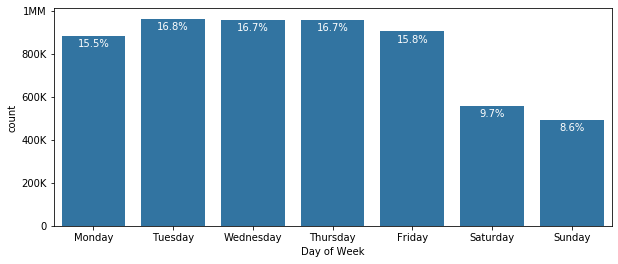

In [17]:
# Proportion of the usages in different days of week.
day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
base_color = sb.color_palette()[0]

plt.figure(figsize = [10,4])
sb.countplot(data=bike_df, x='day_of_week', color=base_color, order = day_order)

n_data = bike_df.shape[0]
day_count = bike_df['day_of_week'].value_counts()
locs, labels = plt.xticks()

yticks = np.arange(0, day_count.max()+200000, 200000)

for loc, label in zip(locs, labels):
    count = day_count[label.get_text()]
    pct_string = '{:0.1f}%'.format(100 * count/n_data)
    plt.text(loc, count-50000, pct_string, ha='center', color = 'white')
    
plt.xlabel('Day of Week')
plt.yticks(yticks,[0,'200K','400K','600K','800K','1MM'])
plt.show()

The bike share service are used most commonly on the weekdays which accounts for 81% of the usages. Weekends account for 19% of usages.  

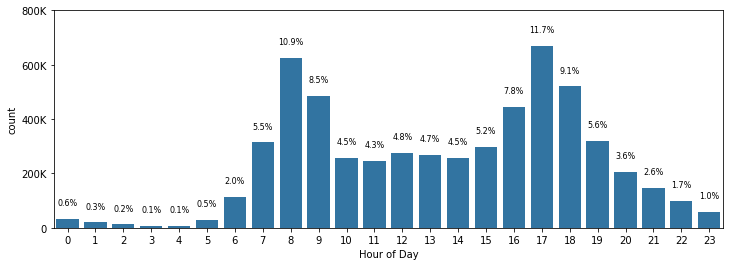

In [18]:
# Proportion of the usages in throughout the day
plt.figure(figsize = [12,4])
hour_order = np.arange(0,24)
base_color = sb.color_palette()[0]
sb.countplot(data=bike_df, x='hour_of_day', color=base_color, order = hour_order)

n_data = bike_df.shape[0]
hour_count = bike_df['hour_of_day'].value_counts()
locs, labels = plt.xticks()

yticks = np.arange(0, hour_count.max()+200000, 200000)

for loc, label in zip(locs, labels):
    count = hour_count[int(label.get_text())]
    pct_string = '{:0.1f}%'.format(100 * count/n_data)
    plt.text(loc, count+50000, pct_string, ha='center', color = 'black', fontsize=8)
    
plt.xlabel('Hour of Day')
plt.yticks(yticks,[0,'200K','400K','600K','800K'])
plt.show()

Since the bike share service was mostly commonly used on Weekday, it's not surprising to see the peaks are during the rush hours at 7-9 and 16-18. 

In [19]:
# Rental access method information was only collected after Jun 2019. 
# I'll create a new dataframe to do the next analyais.  

rental_access_df = bike_df[bike_df.rental_access_method.notnull() == True]
rental_access_df.start_time.min(), rental_access_df.start_time.max()

(Timestamp('2019-06-10 11:13:10'), Timestamp('2020-03-01 23:56:31'))

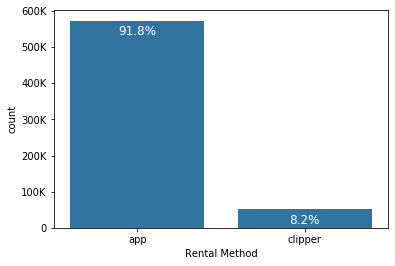

In [20]:
# First, let's take a look at the proportion of different rental access methods.
sb.countplot(data = rental_access_df, x='rental_access_method', color=base_color);

n_data = rental_access_df.shape[0]
method_count = rental_access_df['rental_access_method'].value_counts()
locs, labels = plt.xticks()

yticks = np.arange(0, method_count.max()+100000, 100000)

for loc, label in zip(locs, labels):
    count = method_count[label.get_text()]
    pct_string = '{:0.1f}%'.format(100 * count/n_data)
    plt.text(loc, count-40000, pct_string, ha='center', color = 'white', fontsize=12)

plt.yticks(yticks, [0,'100K','200K','300K','400K','500K','600K'])
plt.xlabel('Rental Method')
plt.show()

From the bar chart above, we can see that most of the users rent the bike through app. 

## Bivariate Exploration

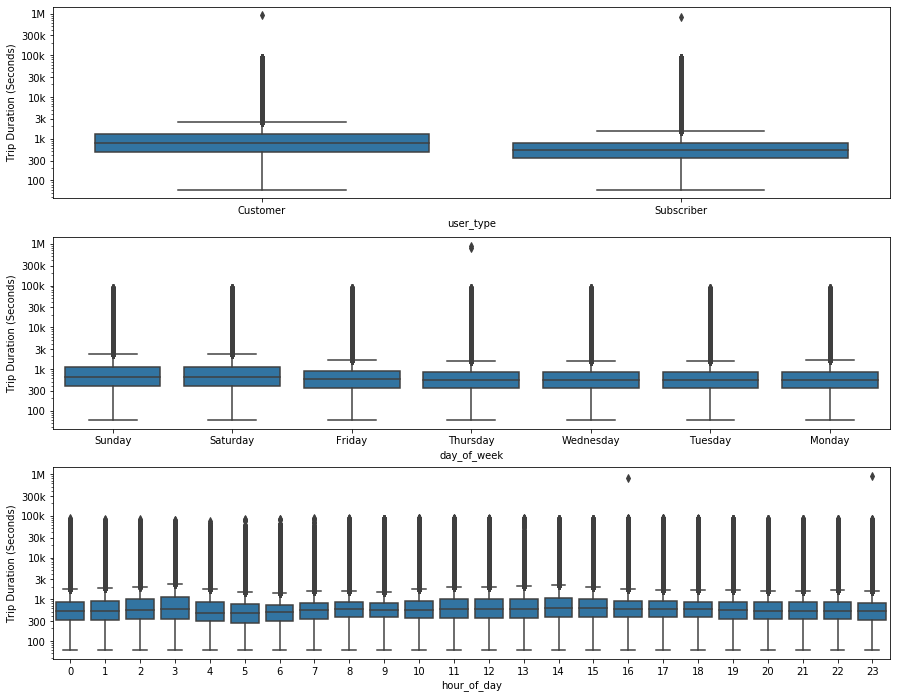

In [21]:
# box plots for user type, day of week and hour of day
base_color = sb.color_palette()[0]
variables = ['user_type', 'day_of_week', 'hour_of_day']

fig, ax = plt.subplots(3, figsize=[15,12])
for var, i in zip(variables, np.arange(3)): 
    sb.boxplot(data=bike_df, x= var, y='duration_sec', color = base_color, ax = ax[i])
    ax[i].set(yscale = 'log', ylabel='Trip Duration (Seconds)', xlabel= var)
    ax[i].set_yticks([100,300, 1000,3000, 10000, 30000, 100000, 300000, 1000000])
    ax[i].set_yticklabels([100,300,'1k','3k','10k','30k','100k','300k', '1M'])
plt.show()

Duration for both Subscriber and Customer Users are normal distribution. Subscribers's average trip duration is shorter than Customers. There is not a visible relationship between the trip duration and the hour of day or the day of week. 

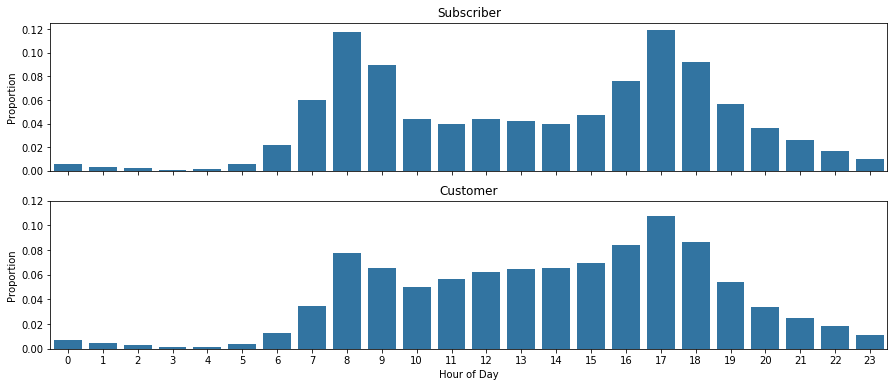

In [22]:
# Compare Subscriber and Customer usage during a day
subscriber_df = bike_df[bike_df['user_type']=='Subscriber']
customer_df = bike_df[bike_df['user_type']=='Customer']

fig, ax = plt.subplots(2, figsize=[15,6], sharex=True)
hour_order = np.arange(0,24)
base_color = sb.color_palette()[0]

dfs = [subscriber_df, customer_df]

for df, i in zip(dfs, range(len(dfs))):
    sb.countplot(data=df, x='hour_of_day', color=base_color, order = hour_order, ax = ax[i])
    n_data = df.shape[0]
    max_count = df['hour_of_day'].value_counts().max()
    max_prop = max_count / n_data

    tick_props = np.arange(0, max_prop + 0.02, 0.02)
    tick_names = ['{:0.2f}'.format(v) for v in tick_props]
    
    ax[i].set_yticks(tick_props * n_data)
    ax[i].set_yticklabels(tick_names)
    
ax[0].set(xlabel = '', ylabel = 'Proportion')
ax[0].set_title('Subscriber')
ax[1].set(xlabel = 'Hour of Day', ylabel = 'Proportion')
ax[1].set_title('Customer')
plt.show()

The proportion of the usage frequency throughout the day have similar pattern for the Subscriber and Customer groups with the highest usage during the rush hours (7-9 & 16-18). Non-subscriber (i.e. Customer group) have higher proportion to use the bike share service in non-rush hour during day time (i.e. 10-15).

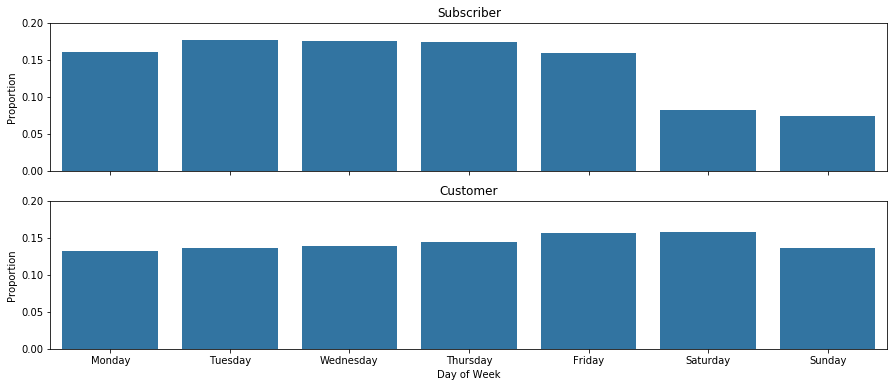

In [23]:
# Compare Subscriber and Customers on their usage in the day of week
fig, ax = plt.subplots(2, figsize=[15,6], sharex=True)
day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
base_color = sb.color_palette()[0]

dfs = [subscriber_df, customer_df]

for df, i in zip(dfs, range(len(dfs))):
    sb.countplot(data=df, x='day_of_week', color=base_color, order = day_order, ax = ax[i])
    n_data = df.shape[0]
    max_count = df['day_of_week'].value_counts().max()
    max_prop = max_count / n_data
    
    tick_props = np.arange(0, max_prop + 0.05, 0.05)
    tick_names = ['{:0.2f}'.format(v) for v in tick_props]
    ax[i].set_yticks(tick_props * n_data)
    ax[i].set_yticklabels(tick_names)

ax[0].set_title('Subscriber')
ax[0].set(xlabel = '', ylabel = 'Proportion')
ax[1].set_title('Customer')
ax[1].set(xlabel = 'Day of Week', ylabel = 'Proportion')
plt.show()

The bike share usage proportion across the week show different pattern among Subscriber and Customer groups. Subscriber use the service mostly during Weekday. However, the Customer group use the service evenly throughtout the week, with slightly higher proportion on Friday and Saturday. It could be that more casual users use the service on Weekends.

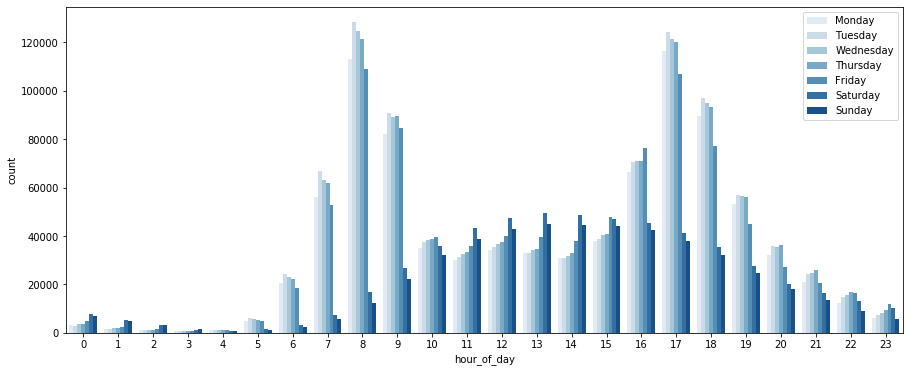

In [24]:
# Relationship between Hour of Day and the Day of Week. 
plt.figure(figsize = [15,6])
day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
sb.countplot(data=bike_df, x= 'hour_of_day', hue ='day_of_week', hue_order = day_order, palette = 'Blues')
plt.legend()
plt.show()

It's not surprising to see there's strong relationship between the hour of day and the day of week. On Weekdays, the usages peak during rush hours. On weekend, the service is used more frequently during the day. It will be interesting to review the relationship changes when adding the layer of User Types.

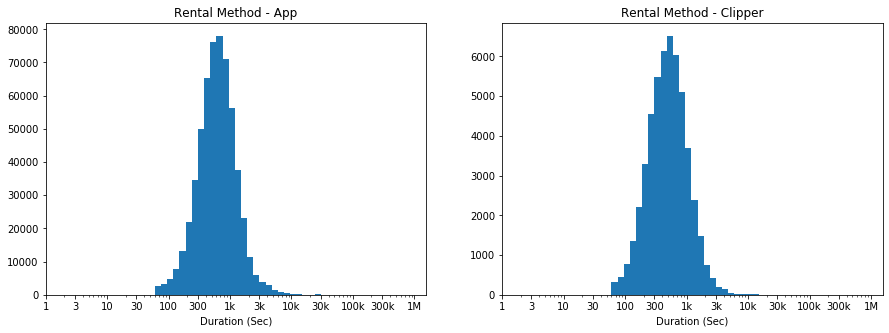

In [25]:
# Review the rental access method dataframe again and see if any difference in the distribution.
df_app = rental_access_df[rental_access_df['rental_access_method'] == 'app']
df_clipper = rental_access_df[rental_access_df['rental_access_method'] == 'clipper']
log_binsize = 0.1
bins = 10 ** np.arange(np.log10(rental_access_df.duration_sec).min(), 
                       np.log10(rental_access_df.duration_sec).max()+log_binsize, log_binsize)
ticks = [1,3,10,30,100,300,1000,3000,10000,30000,100000,300000,1000000]

plt.figure(figsize = [15,5])
plt.subplot(1,2,1)
plt.hist(data = df_app, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks(ticks, [1,3,10,30,100,300,'1k','3k','10k','30k','100k','300k','1M'])
plt.title('Rental Method - App')
plt.xlabel('Duration (Sec)')

plt.subplot(1,2,2)
plt.hist(data = df_clipper, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks(ticks, [1,3,10,30,100,300,'1k','3k','10k','30k','100k','300k','1M'])
plt.title('Rental Method - Clipper')
plt.xlabel('Duration (Sec)')
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


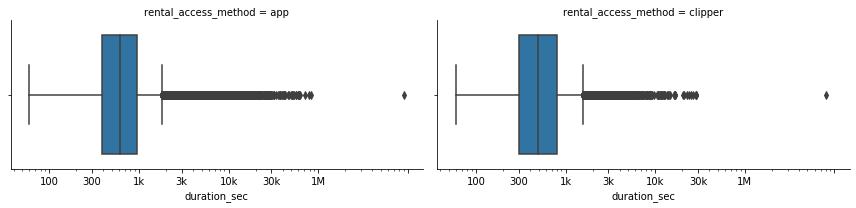

In [26]:
# Review with Box plot again
g = sb.FacetGrid(data= rental_access_df, col = 'rental_access_method', aspect = 2, height = 3 )
g.map(sb.boxplot,'duration_sec')
g.set(xscale = 'log')
g.set(xticks = [100,300,1000,3000,10000,30000,100000,1000000], xticklabels=[100,300,'1k','3k','10k','30k','1M'])
plt.show()

There doesnt seem to be difference in the duration distribution among different rental access methods. 

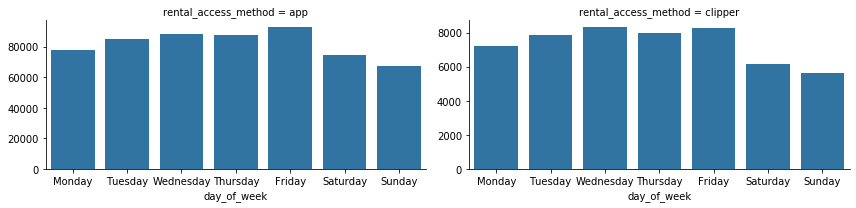

In [27]:
# Compare the proportion in the day of week
g = sb.FacetGrid(data= rental_access_df, col = 'rental_access_method', aspect = 2, height = 3, sharey=False )
g.map(sb.countplot,'day_of_week',order = day_order)
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


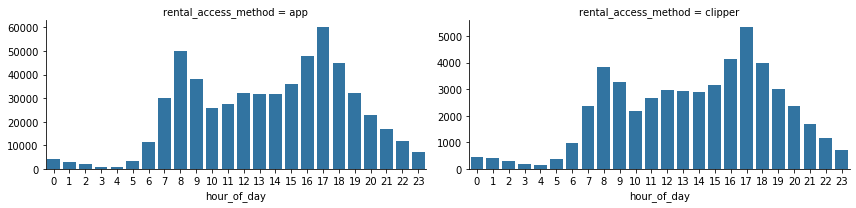

In [28]:
# Compare the proportion in the hour of day
g = sb.FacetGrid(data= rental_access_df, col = 'rental_access_method', 
                 aspect = 2, height = 3, sharey=False, palette = 'Blues')
g.map(sb.countplot,'hour_of_day')
plt.show()

There doesn't seem to be relationship between different rental access method and the trip duration. There's not a strong reltaionship between rental method and the usage during the week and during the day.

## Multivariate Exploration

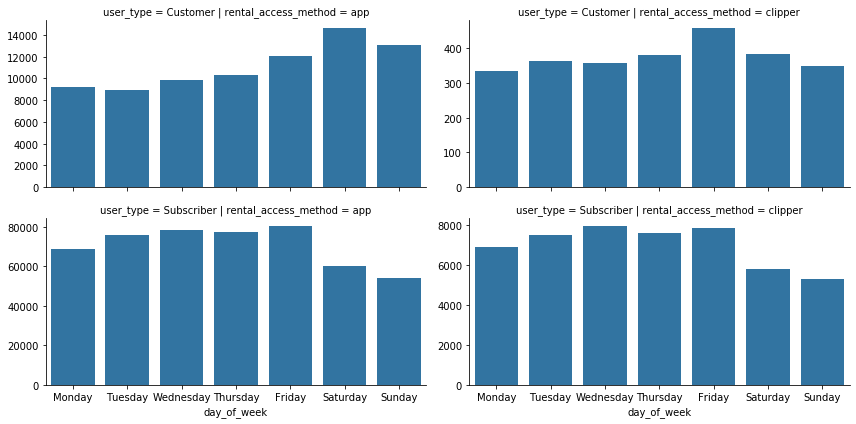

In [29]:
# User Type and Rental Access Method - usages on the day of week
g = sb.FacetGrid(data= rental_access_df, col = 'rental_access_method', row = 'user_type',
                 aspect = 2, height = 3, sharey=False )
g.map(sb.countplot,'day_of_week',order = day_order)
plt.show()

No matter how the Subscribers rent the bike (either through app or through clipper), they use the service more frequently on Weekdays. As for Customers who rent through app, they use the service more on the Weekends. 

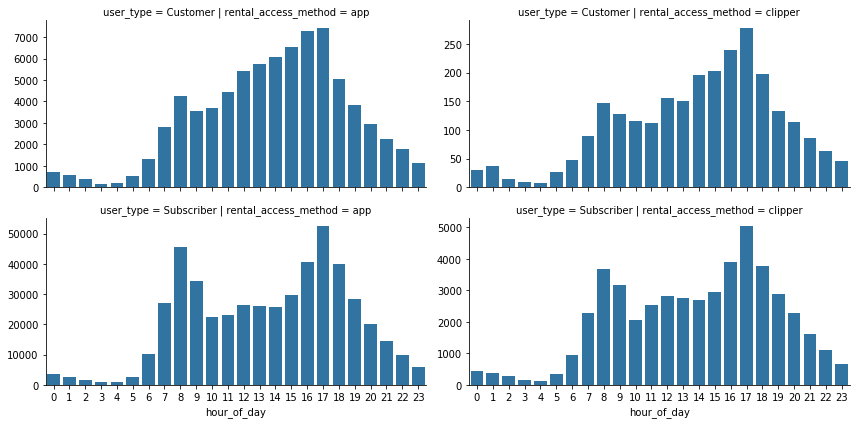

In [30]:
# User Type and Rental Access Method - usages on the hour of day
g = sb.FacetGrid(data= rental_access_df, col = 'rental_access_method', row ='user_type', 
                 aspect = 2, height = 3, sharey=False, palette = 'Blues')
g.map(sb.countplot,'hour_of_day')
plt.show()

The usage pattern during the day seem to be similar for different user types and rental access method.

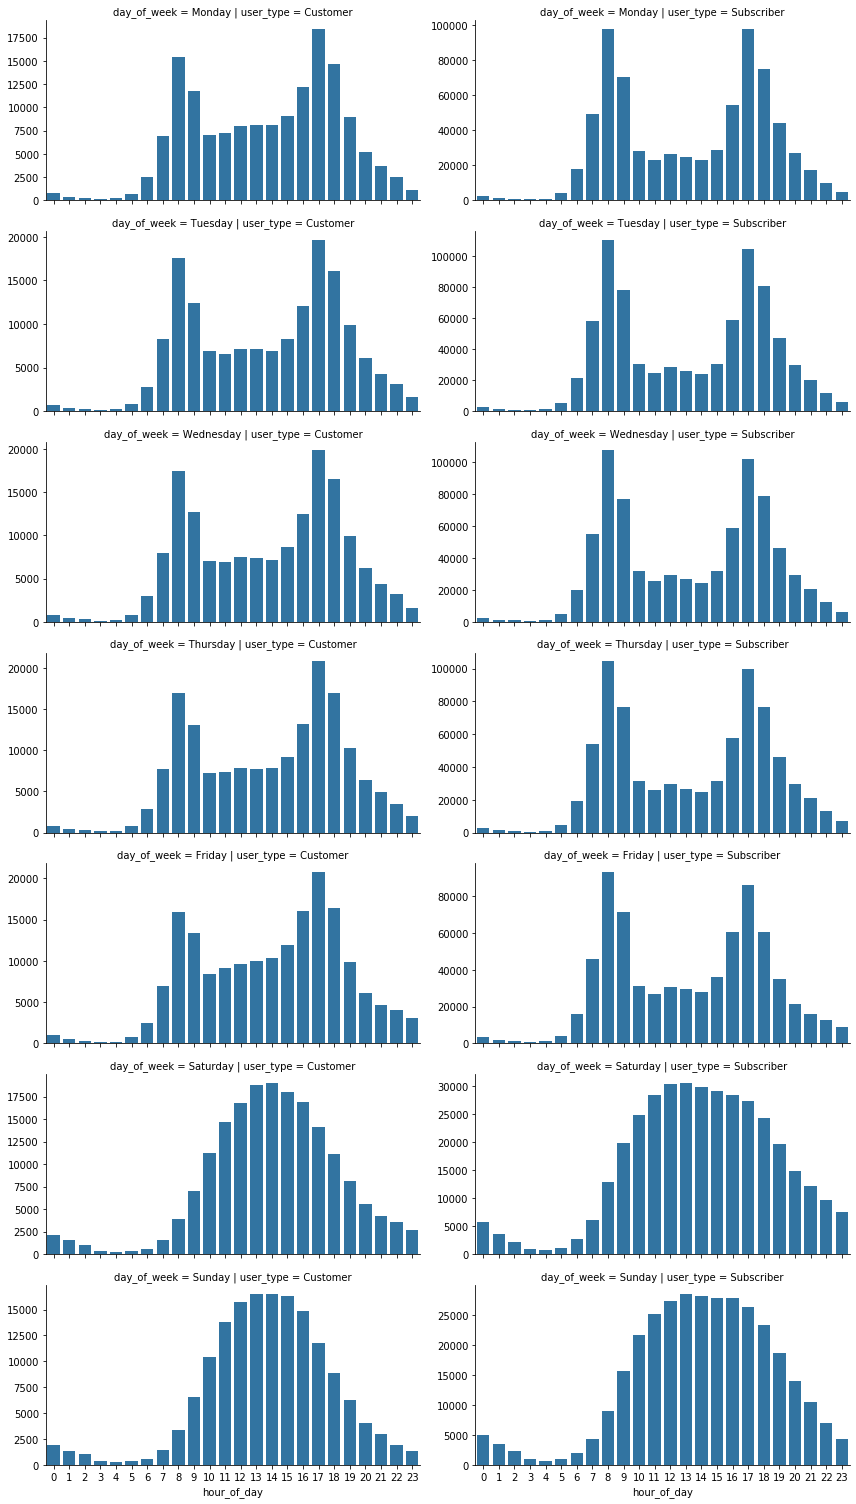

In [31]:
# Bike share usage pattern on each day of week & User Types
day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

g = sb.FacetGrid(data=bike_df, col = 'user_type', row ='day_of_week', sharey= False,
                 row_order = day_order, palette = 'Blues', aspect = 2, height = 3)
g.map(sb.countplot, 'hour_of_day')
plt.show()

There doesn't seem to be a strong relationship between user types and the hour of day and day of week. The pattern are very similar between these 2 different user types. 